***

# Análisis de datos I

***

### Taller 4 - Comparte la preparación de los datos

#### 1. Selección de las columnas para la preparación de los datos.

Para llevar a cabo la preparación de los datos del dataset definido, se seleccionaron las siguientes columnas: 

1. **Pais (Geography)**: Permite identificar patrones regionales en la tasa de abandono de clientes, ya que las condiciones económicas y la competencia bancaria varían entre diferentes áreas o paises, lo que puede afectar la satisfacción del cliente.

2. **Genero (Gender)**: Ayuda a entender las diferencias en los comportamientos y preferencias financieras entre hombres y mujeres, permitiendo al banco adaptar sus ofertas y estrategias de retención de manera más efectiva.

Las columnas **Pais** y **Genero** proporcionan una visión más matizada de los factores que contribuyen al abandono, mejorando así la precisión de los modelos predictivos y la capacidad de la entidad bancaria para desarrollar estrategias dirigidas a reducir la pérdida de clientes.

#### 2. Preparación de los datos

A continuación se presenta la preparación de los datos para las columnas seleccionadas, implementado en Python.

In [63]:
# Importar las bibliotecas de Python requeridas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Data Frame.
df = pd.read_csv('customer_churn_records.csv')

# Eliminar la columnas RowNumber y Surname del DataFrame.
df = df.drop('RowNumber', axis = 1)
df = df.drop('Surname', axis = 1)

In [77]:
# Verificar si existen datos vacíos o faltantes en el DataFrame.
df.isna().sum()

ClienteId              0
PuntajeCredito         0
Pais                   0
Genero                 0
Edad                   0
TiempoPermanencia      0
Saldo                  0
CantidadProductos      0
TieneTarjetaCredito    0
EstaActivo             0
SalarioEstimado        0
ClienteAbandono        0
HizoReclamo            0
NivelSatisfaccion      0
TipoTarjeta            0
PuntosObtenidos        0
dtype: int64

Se puede observar que no hay datos vacíos o faltantes en el dataset definido.

In [64]:
# Verificar si existen datos duplicados en el DataFrame.
print(f'Cantidad de datos duplicados: {df.duplicated().sum()}')

Cantidad de datos duplicados: 0


Se puede observar que no hay datos duplicados en el dataset definido.

In [10]:
# Imprimir los primeros cinco registros del DataFrame.
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [65]:
# Imprimir los últimos cinco registros del DataFrame.
df.tail()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [66]:
# Definir los nombres de las columas del DataFrame.
df.columns = ['ClienteId', 'PuntajeCredito', 'Pais', 'Genero', 'Edad', 'TiempoPermanencia', 'Saldo', 'CantidadProductos', 'TieneTarjetaCredito', 'EstaActivo', 'SalarioEstimado', 'ClienteAbandono', 'HizoReclamo', 'NivelSatisfaccion', 'TipoTarjeta', 'PuntosObtenidos']

# Imprimir los primeros cinco registros del DataFrame con los nuevos nombres de las columnas.
df.head()

,ClienteId,PuntajeCredito,Pais,Genero,Edad,TiempoPermanencia,Saldo,CantidadProductos,TieneTarjetaCredito,EstaActivo,SalarioEstimado,ClienteAbandono,HizoReclamo,NivelSatisfaccion,TipoTarjeta,PuntosObtenidos
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [74]:
# Obtener la cantidad de registros de la columna Pais.
print('Cantidad de registros de la columna Pais según su categoría:')
df['Pais'].value_counts()

Cantidad de registros de la columna Pais según su categoría:


Pais
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [75]:
# Obtener la cantidad de registros de la columna Genero.
print('Cantidad de registros de la columna Genero según su categoría:')
df['Genero'].value_counts()

Cantidad de registros de la columna Genero según su categoría:


Genero
Male      5457
Female    4543
Name: count, dtype: int64

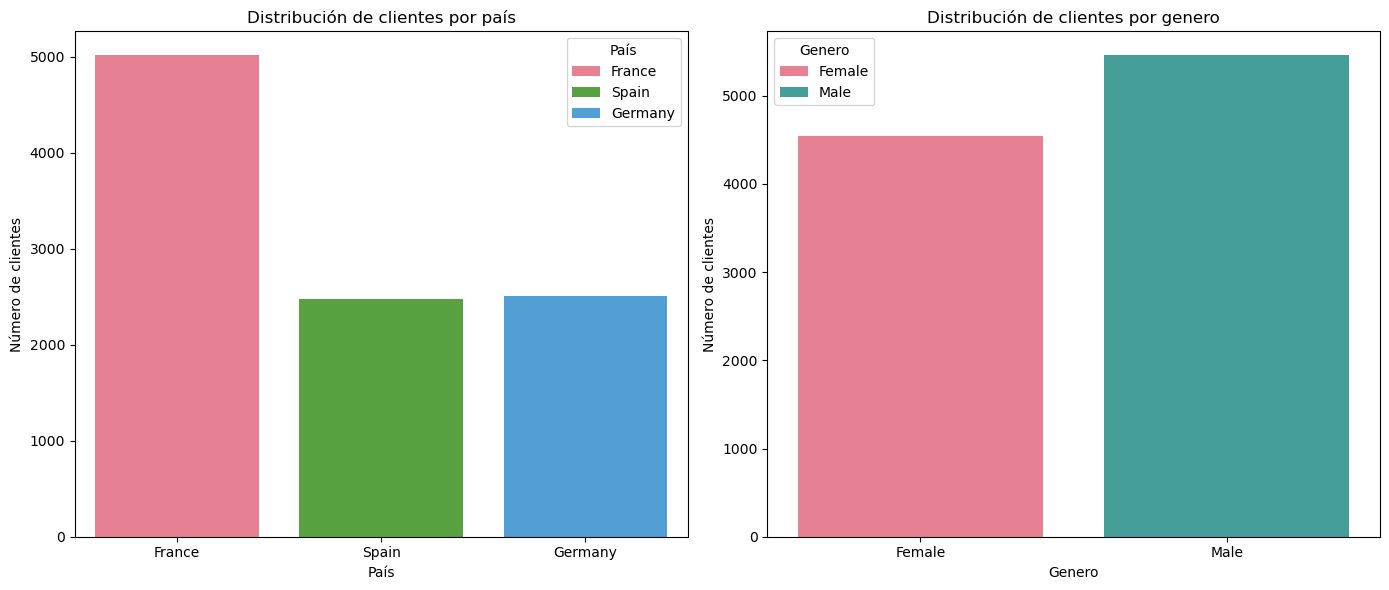

In [76]:
# Gráfico de distribución las columnas Pais y Genero.
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
palette = sns.color_palette('husl', len(df['Pais'].unique()))
ax = sns.countplot(data = df, x = 'Pais', hue = 'Pais', palette = palette)

plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por país')
plt.legend(labels = df['Pais'].unique(), title = 'País', loc = 'upper right')

plt.subplot(1, 2, 2)
palette = sns.color_palette('husl', len(df['Genero'].unique()))
ax = sns.countplot(data = df, x = 'Genero', hue = 'Genero', palette = palette)

plt.xlabel('Genero')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por genero')
plt.legend(labels = df['Genero'].unique(), title = 'Genero', loc = 'upper left')

plt.tight_layout()
plt.show()

Los diagramas de distribución de clientes por **Pais** y **Genero** muestran una distribución notablemente desigual en ambas categorías. Respecto a los países, France domina con más de la mitad de los registros, seguida por Germany y Spain, que tienen proporciones casi idénticas pero con una ligera ventaja para Germany.  En cuanto al género, hay una ligera inclinación hacia Male, que representa aproximadamente el 54.6% de los registros frente al 45.4% de Female. 

Estas distribuciones indican una fuerte representación de France y un leve predominio del género masculino en los datos, lo cual puede ser relevante para personalizar las estrategias de retención, permitiendo ajustes específicos para abordar las necesidades y comportamientos de cada grupo demográfico y reducir así el riesgo de abandono de clientes.

A continuación se realiza el proceso de label encoding para las columnas **Pais** y **Genero**.

In [48]:
# Aplicar el proceso de label encoding para convertir las columnas Pais y Genero de categóricas a numéricas.

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Crear una instancia de label encoder.
label = LabelEncoder()

In [42]:
df['Pais'] = label.fit_transform(df['Pais'])

# Obtener la cantidad de registros de Pais con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna Pais después de aplicar el proceso de label encoding:')
df['Pais'].value_counts()

Cantidad de registros de la columna Pais después de aplicar el proceso de label encoding:


Pais
0    5014
1    2509
2    2477
Name: count, dtype: int64

- France se convirtió en 0
- Germany se convirtió en 1
- Spain se convirtió en 2

In [44]:
df['Genero'] = label.fit_transform(df['Genero'])

# Obtener la cantidad de registros de Genero con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna Genero después de aplicar el proceso de label encoding:')
df['Genero'].value_counts()

Cantidad de registros de la columna Genero después de aplicar el proceso de label encoding:


Genero
1    5457
0    4543
Name: count, dtype: int64

- Male se convirtió en 0
- Female se convirtió en 1

Adicional a las columnas seleccionadas inicialmente, se realiza el proceso de label encoding para la columna **TipoTarjeta**, la cual indica el tipo de tarjeta que posee el cliente.

In [45]:
# Obtener la cantidad de registros de la columna TipoTarjeta.
print('Cantidad de registros de la columna TipoTarjeta según su categoría:')
df['TipoTarjeta'].value_counts()

Cantidad de registros de la columna TipoTarjeta según su categoría:


TipoTarjeta
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [46]:
df['TipoTarjeta'] = label.fit_transform(df['TipoTarjeta'])

# Obtener la cantidad de registros de TipoTarjeta con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna TipoTarjeta después de aplicar el proceso de label encoding:')
df['TipoTarjeta'].value_counts()

Cantidad de registros de la columna TipoTarjeta después de aplicar el proceso de label encoding:


TipoTarjeta
0    2507
1    2502
3    2496
2    2495
Name: count, dtype: int64

- DIAMOND se convirtió en 0
- GOLD se convirtió en 1
- SILVER se convirtió en 2
- PLATINUM se convirtió en 3

Para evaluar el impacto de las variables **Pais** y **Genero** en la probabilidad de que un cliente abandone la entidad bancaria, se analizará su correlación con la variable **ClienteAbandono** que corresponde a la variable objetivo del modelo. 

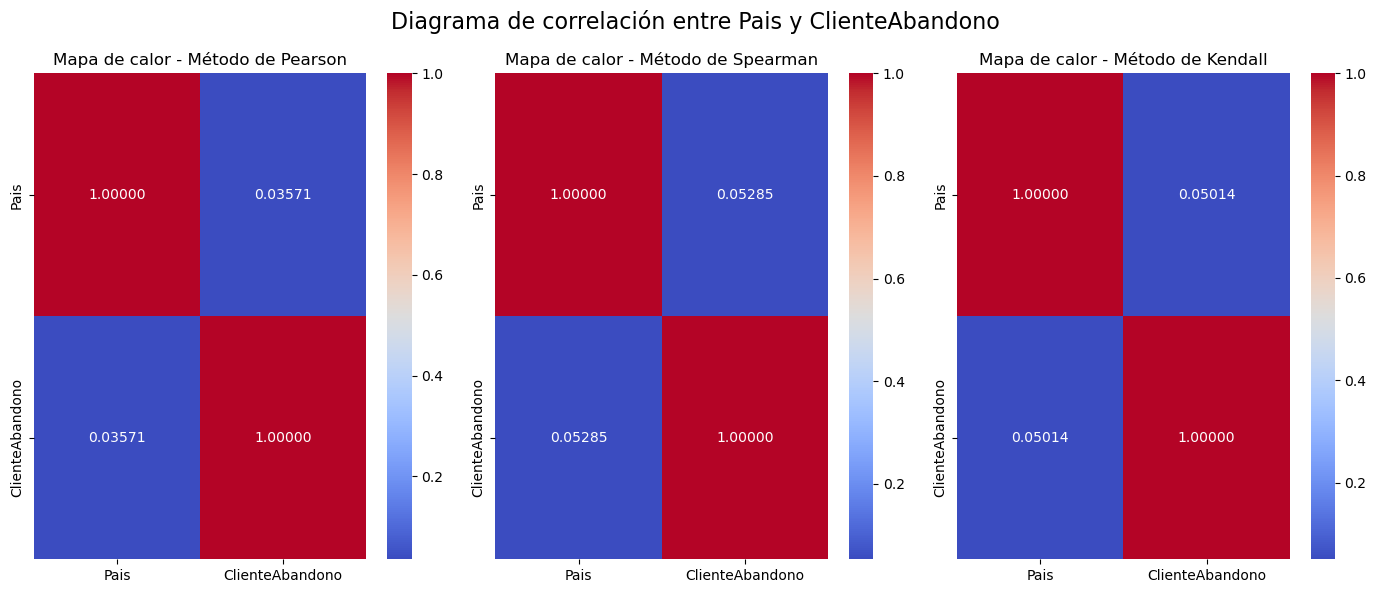

Correlación entre Pais y ClienteAbandono
Método de Pearson: 0.03571249985775273
Método de Spearman: 0.052848864411950455
Método de Kendall: 0.05014161988378433


In [56]:
# Cálculo de la correlación entre Pais y ClienteAbandono utilizando los métodos de Pearson, Spearman y Kendall.
corr_pearson = df[['Pais','ClienteAbandono']].corr(method = 'pearson').iloc[0, 1]
corr_spearman = df[['Pais','ClienteAbandono']].corr(method = 'spearman').iloc[0, 1]
corr_kendall = df[['Pais','ClienteAbandono']].corr(method = 'kendall').iloc[0, 1]

# Gráfico del mapa de calor de la matriz de correlación entre Pais y ClienteAbandono utilizando los métodos de Pearson, Spearman y Kendall.
plt.figure(figsize = (14, 6))
plt.suptitle('Diagrama de correlación entre Pais y ClienteAbandono', fontsize = 16)

plt.subplot(1, 3, 1)
sns.heatmap(df[['Pais', 'ClienteAbandono']].corr(method = 'pearson'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Pearson')

plt.subplot(1, 3, 2)
sns.heatmap(df[['Pais', 'ClienteAbandono']].corr(method = 'spearman'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(df[['Pais', 'ClienteAbandono']].corr(method = 'kendall'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Kendall')

plt.tight_layout()
plt.show()

print(f'Correlación entre Pais y ClienteAbandono')
print(f'Método de Pearson: {corr_pearson}')
print(f'Método de Spearman: {corr_spearman}')
print(f'Método de Kendall: {corr_kendall}')

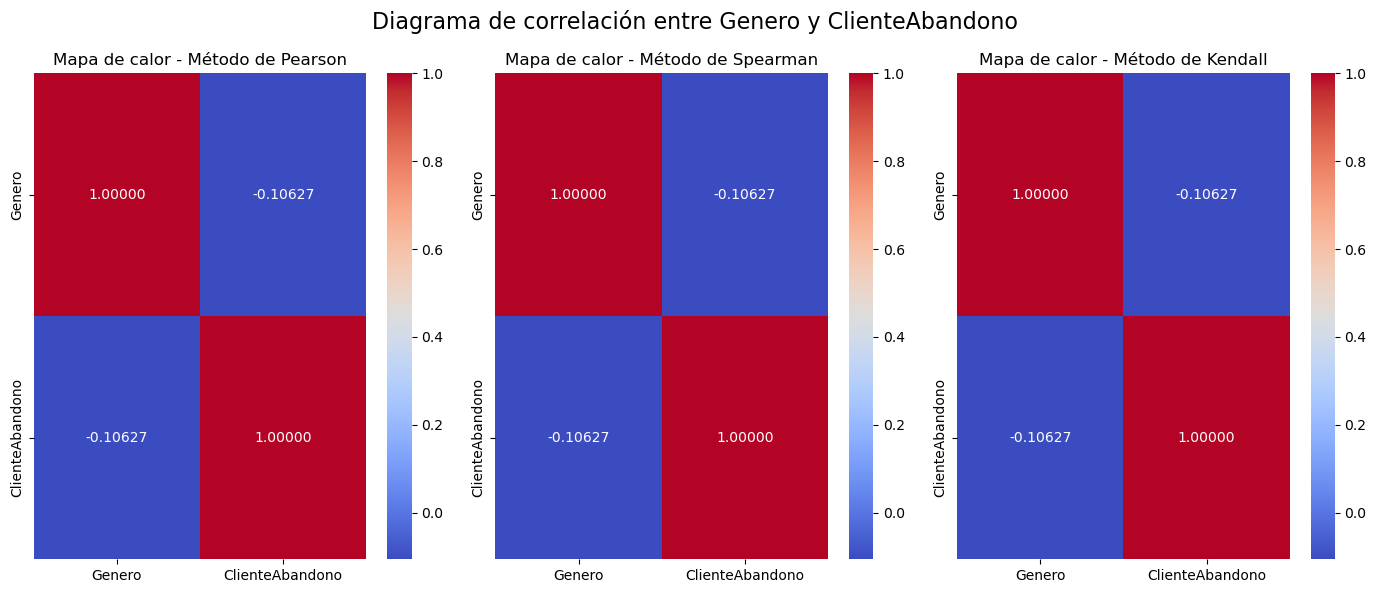

Correlación entre Genero y ClienteAbandono
Método de Pearson: -0.10626653301252881
Método de Spearman: -0.10626653301252877
Método de Kendall: -0.1062665330125288


In [61]:
# Cálculo de la correlación entre Genero y ClienteAbandono utilizando los métodos de Pearson, Spearman y Kendall.
corr_pearson = df[['Genero','ClienteAbandono']].corr(method = 'pearson').iloc[0, 1]
corr_spearman = df[['Genero','ClienteAbandono']].corr(method = 'spearman').iloc[0, 1]
corr_kendall = df[['Genero','ClienteAbandono']].corr(method = 'kendall').iloc[0, 1]

# Gráfico del mapa de calor de la matriz de correlación entre Genero y ClienteAbandono utilizando los métodos de Pearson, Spearman y Kendall.
plt.figure(figsize = (14, 6))
plt.suptitle('Diagrama de correlación entre Genero y ClienteAbandono', fontsize = 16)

plt.subplot(1, 3, 1)
sns.heatmap(df[['Genero', 'ClienteAbandono']].corr(method = 'pearson'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Pearson')

plt.subplot(1, 3, 2)
sns.heatmap(df[['Genero', 'ClienteAbandono']].corr(method = 'spearman'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(df[['Genero', 'ClienteAbandono']].corr(method = 'kendall'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Kendall')

plt.tight_layout()
plt.show()

print(f'Correlación entre Genero y ClienteAbandono')
print(f'Método de Pearson: {corr_pearson}')
print(f'Método de Spearman: {corr_spearman}')
print(f'Método de Kendall: {corr_kendall}')

El análisis de la correlación entre las columnas **Pais** y **Genero** con respecto a la variable objetivo **ClienteAbandono**, muestra diferencias significativas en la relación entre estas variables y la probabilidad de abandono de los clientes de la entidad bancaria.

Para la variable **Pais**, los coeficientes de correlación obtenidos con los diferentes métodos evaluados (Pearson, Spearman y Kendall) son muy bajos indicando una correlación débil, lo que sugiere que este no sería un buen predictor de la probabilidad de abandono en el contexto analizado. Por otro lado, la variable **Genero** muestra una correlación negativa constante y más pronunciada con **ClienteAbandono**, lo que indica una ligera tendencia hacia una menor probabilidad de abandono en uno de los géneros. Aunque esta correlación es débil, su consistencia sugiere que **Genero** podría ser un predictor relevante cuando se considera en combinación con otras variables.

En resumen, mientras que el **Pais** no parece influir en el abandono de clientes, el **Genero** muestra una correlación débil pero consistente con una ligera tendencia hacia la reducción en la probabilidad de abandono. Ambos indicadores muestran una influencia limitada por sí solos, pero su inclusión en el modelo puede aportar valor al ofrecer un perfil más completo y segmentado del cliente, especialmente al analizar interacciones con otras variables y ajustar las estrategias de retención.

#### 3. Conclusiones

1. Convertir **Pais** y **Genero** a datos numéricos mediante label encoding es crucial para su correcto procesamiento por modelos predictivos.
2.  La desigual distribución de clientes según **Pais** y **Genero** requiere estrategias de retención específicas y adecuada preparación de datos para un análisis exhaustivo.
3.  La baja correlación entre **Pais** y **ClienteAbandono** no lo convierte en un buen predictor por sí solo. Su preparación permite explorar interacciones con otras variables.
4.  La débil correlación negativa entre **Genero** y **ClienteAbandono** sugiere una ligera tendencia hacia menor abandono. La preparación de datos mejora su uso en modelos predictivos combinados con otras variables.